# Dataloader

In [ ]:
from ModuleDataLoader import *

# KEEP THIS MEDIA PATH pls
main_path = "./media/NAS"

#### usate solo PreSocial, potete definire il tipo di GAN ed il livello di psi per le immagini fake. Altri dettagli nel readme pk sono stanca :)

loading TrueFace
Attempting to load data from: ./media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Real/FFHQ
Number of images found for 'Real': 100
Length of dataset after Subset for 'Real': 100
Attempting to load data from: ./media/NAS/TrueFace/TrueFace/TrueFace_PreSocial/Fake/StyleGAN/images-psi-0.5
Number of images found for 'Fake': 100
Length of dataset after Subset for 'Fake': 100
Total number of images in combined dataset: 200
Number of images in the dataset: 200


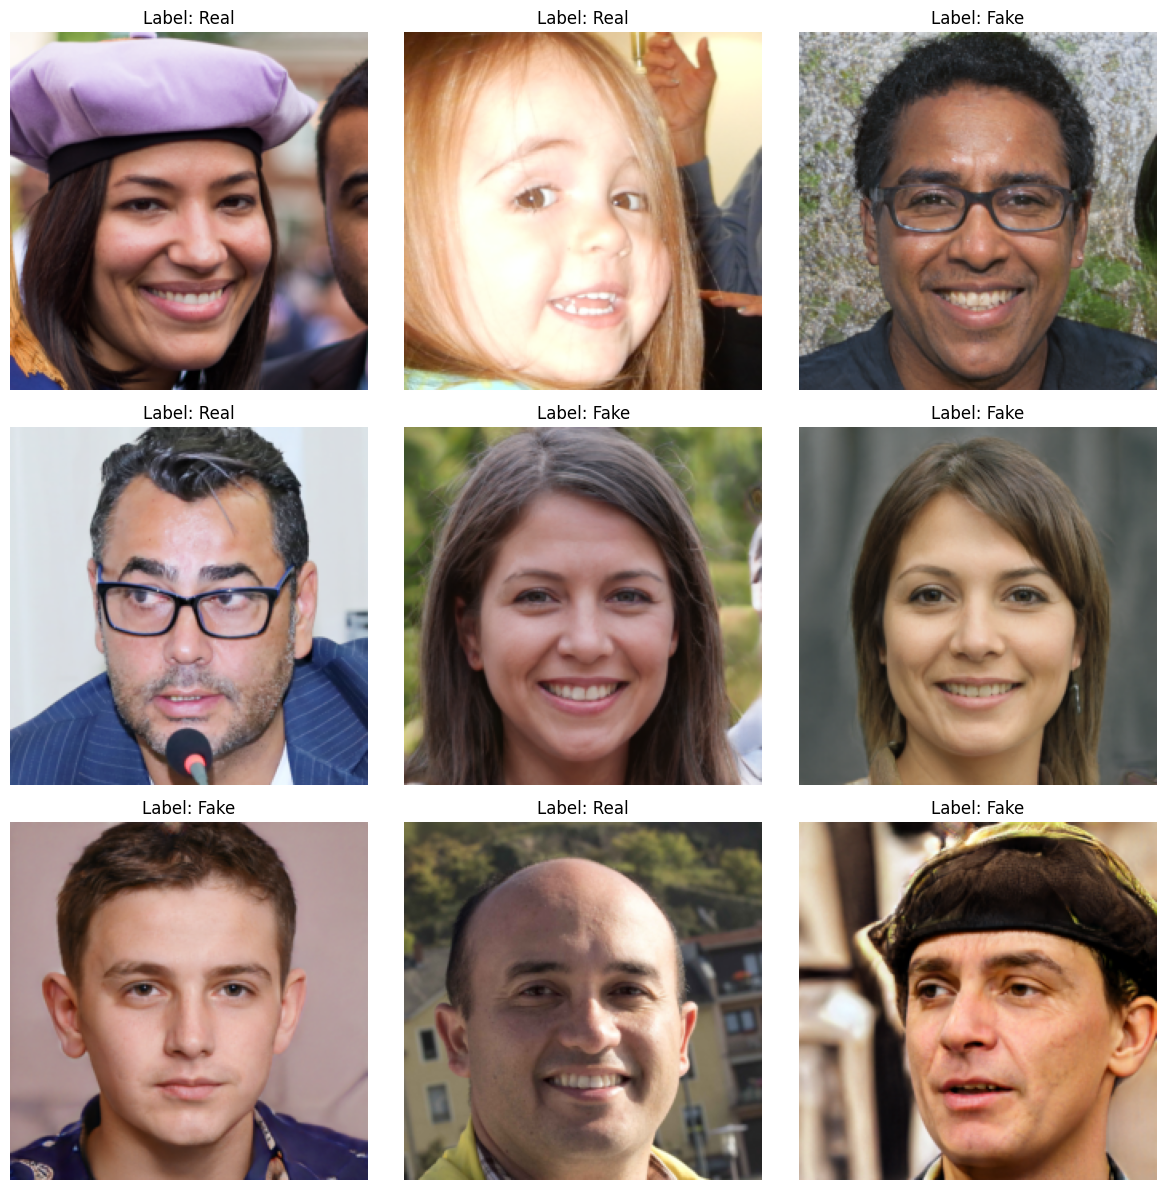

In [17]:
print("loading TrueFace")

### LOADER FOR TrueFace
loader_TrueFace = DataloaderTrueFace(main_path)
dataloader_TrueFace = loader_TrueFace.load_data(
    main_category='TrueFace_PreSocial', 
    platform='Facebook',
    styleGAN_type='StyleGAN',
    psi_value="images-psi-0.5",
    batch_size=64,
    max_images_per_class=10000  # LIMIT NUMBER imgs to load sennò pc crasha
)

num_images = len(dataloader_TrueFace.dataset)
print(f"Number of images in the dataset: {num_images}")

### plottare immagini
images, labels = next(iter(dataloader_TrueFace))
plot_images(images, labels, classes=['Fake', 'Real'], num_images=9)